In [5]:
#### Gradients - Absolute function

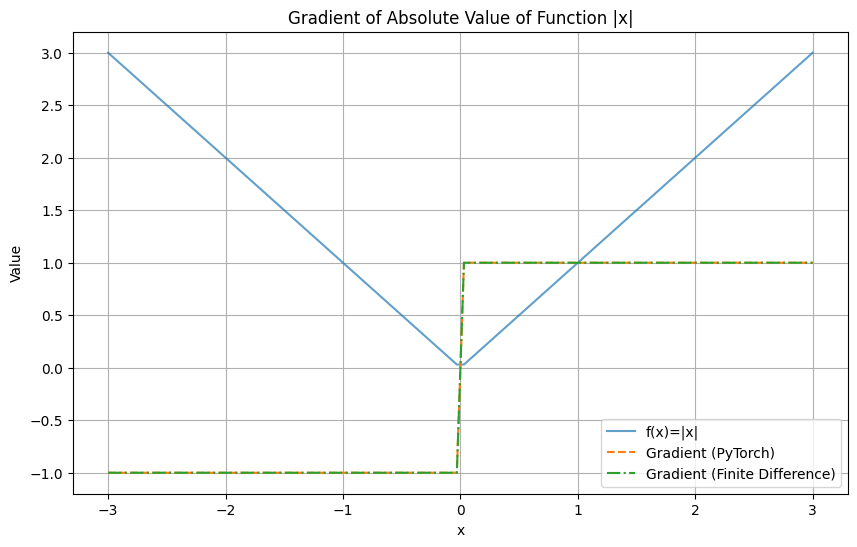

In [6]:
import numpy as np
import torch

# 1. Calculate Gradient using PyTorch (Automatic Differentiation)
def f_pytorch(x):
    return torch.abs(x)

# Create a tensor for x with requires_grad=True (for autograd)
x = torch.linspace(-3, 3, 100, dtype=torch.float32, requires_grad=True)

# Calculate f(x) = |x| using PyTorch
y = f_pytorch(x)

# Compute gradients using backpropagation (automatic differentiation)
y.backward(torch.ones_like(x))  # Compute gradient for all values of x

# Get the gradients from PyTorch
grad_pytorch = x.grad

# 2. Calculate Gradient using Finite Difference
def finite_difference_gradient(x_vals, epsilon=1e-5):
    grad_fd = np.zeros_like(x_vals)
    
    for i, x in enumerate(x_vals):
        x_plus = x + epsilon
        x_minus = x - epsilon
        
        # Compute the function values for perturbed x
        y_plus = np.abs(x_plus)
        y_minus = np.abs(x_minus)
        
        # Approximate gradient using finite difference
        grad_fd[i] = (y_plus - y_minus) / (2 * epsilon)
    
    return grad_fd


# Convert x to numpy for finite difference calculation
x_np = x.detach().numpy()

# Convert PyTorch tensor to numpy array
y_np = y.detach().numpy()  

# Compute gradient using finite difference
grad_fd = finite_difference_gradient(x_np)

# Plot the results for both methods and x
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot x and y = |x| for reference
plt.plot(x_np, y_np, label='f(x)=|x|', linestyle='-', alpha=0.7)

# Plot the gradients calculated using PyTorch
plt.plot(x_np, grad_pytorch.detach().numpy(), label='Gradient (PyTorch)', linestyle='--')

# Plot the gradients calculated using finite difference
plt.plot(x_np, grad_fd, label='Gradient (Finite Difference)', linestyle='-.')

# Add labels, title, legend, and grid
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Gradient of Absolute Value of Function |x|')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
